<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cluster-visuell-entdecken" data-toc-modified-id="Cluster-visuell-entdecken-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cluster visuell entdecken</a></span><ul class="toc-item"><li><span><a href="#Histogramme" data-toc-modified-id="Histogramme-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Histogramme</a></span></li><li><span><a href="#Kernel-Density-Estimation" data-toc-modified-id="Kernel-Density-Estimation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Kernel Density Estimation</a></span><ul class="toc-item"><li><span><a href="#Scatterplots" data-toc-modified-id="Scatterplots-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Scatterplots</a></span></li></ul></li><li><span><a href="#Scatterplot-Matrizen-/" data-toc-modified-id="Scatterplot-Matrizen-/-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scatterplot Matrizen /</a></span></li><li><span><a href="#Dimensionsreduktion" data-toc-modified-id="Dimensionsreduktion-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Dimensionsreduktion</a></span><ul class="toc-item"><li><span><a href="#Dimensionsreduktion-mit-der-Principal-Component-Analysis" data-toc-modified-id="Dimensionsreduktion-mit-der-Principal-Component-Analysis-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Dimensionsreduktion mit der Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#PCA-mit-scikit-learn" data-toc-modified-id="PCA-mit-scikit-learn-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>PCA mit scikit-learn</a></span></li></ul></li><li><span><a href="#Multidimensional-Scaling-(MDS)" data-toc-modified-id="Multidimensional-Scaling-(MDS)-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Multidimensional Scaling (MDS)</a></span></li><li><span><a href="#t-distributed-Stochastic-Neighbor-Embedding-(t-sne)" data-toc-modified-id="t-distributed-Stochastic-Neighbor-Embedding-(t-sne)-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>t-distributed Stochastic Neighbor Embedding (t-sne)</a></span></li><li><span><a href="#Umap" data-toc-modified-id="Umap-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Umap</a></span></li></ul></li></ul></li><li><span><a href="#Literatur" data-toc-modified-id="Literatur-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Literatur</a></span></li></ul></div>

# Cluster visuell entdecken

In [2]:
%matplotlib inline

import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import manifold
import sklearn.datasets 

In [3]:
# loading data from scikit learn
iris = sklearn.datasets.load_iris()

In [4]:
# scikit learn uses a special format, very similar to dictionary, for its data, called Bunch
type(iris)

sklearn.utils.Bunch

Bunch ist eine Art dictionary, wir können also die einschlägigen Methoden verwenden, um es zu explorieren

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

iris.data enthält die Daten in einer Matrix. Wir wissen aus der Beschreibung, dass wir 150 Instanzen haben, in diesem Fall 1250 unterschiedliche Blumen, die zu drei verschiedenen Klassen gehören ([Bilder](https://en.wikipedia.org/wiki/Iris_flower_data_set)). Jede Blume wird durch 4 Messpunkte beschrieben (alle in cm): Länge und Breite des  Kelchblatts (sepal) sowie Länge und Breite des Blütenblatts (petal).

Wir sollten also eine Matrix mit 150 Reihen und 4 Spalten haben:

In [7]:
iris.data.shape

(150, 4)

Das sind die Namen der Spalten:

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Unter iris.target haben wir Zugriff auf die Label, die uns normalerweise beim Clustering nicht zur Verfügung stehen, und unter target_names auf die Namen der Klassen:

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [12]:
df['species'] = pd.Series(iris.target).replace([0, 1, 2], iris.target_names)

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Histogramme

Erklärung: Everitt Kap.2.2.1

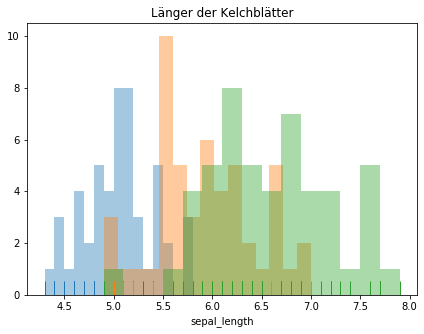

In [13]:
plt.figure(figsize=(7,5))
plt.title('Länger der Kelchblätter')
for iris_class in iris.target_names:
    sns.distplot(df.sepal_length[df.species==iris_class], kde=False, rug=True, bins=15, label=iris_class)

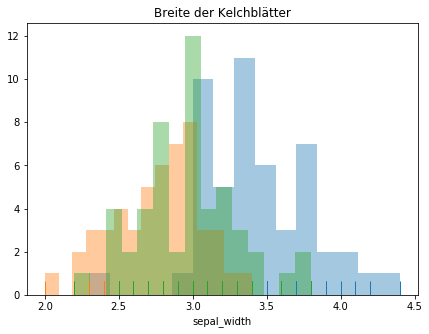

In [14]:
plt.figure(figsize=(7,5))
plt.title('Breite der Kelchblätter')
for iris_class in iris.target_names:
    sns.distplot(df.sepal_width[df.species==iris_class], kde=False, rug=True, bins=15, label=iris_class)

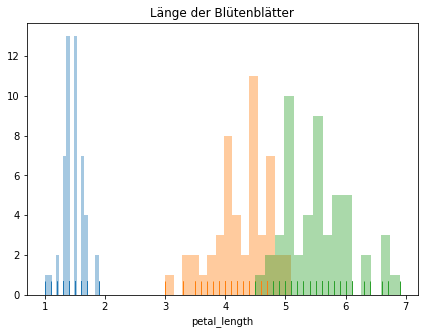

In [15]:
plt.figure(figsize=(7,5))
plt.title('Länge der Blütenblätter')
for iris_class in iris.target_names:
    sns.distplot(df.petal_length[df.species==iris_class], kde=False, rug=True, bins=15, label=iris_class)

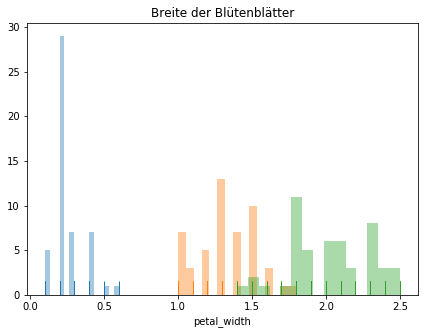

In [16]:
plt.figure(figsize=(7,5))
plt.title('Breite der Blütenblätter')
for iris_class in iris.target_names:
    sns.distplot(df.petal_width[df.species==iris_class], kde=False, rug=True, bins=15, label=iris_class)

## Kernel Density Estimation

Erklärung Everitt 2.2.3

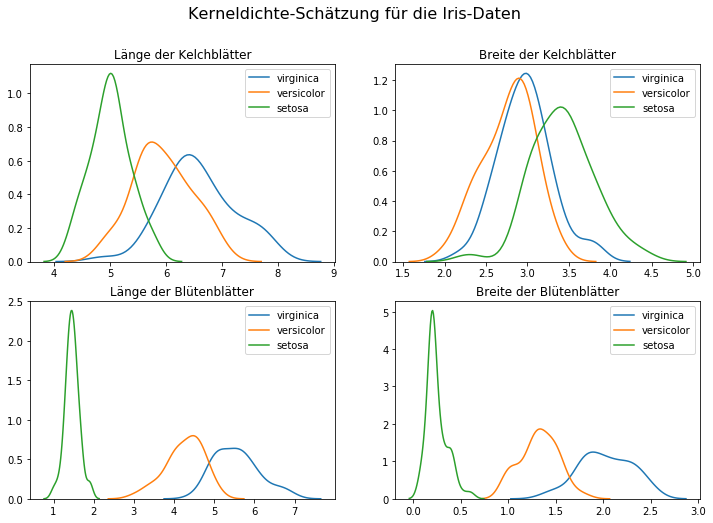

In [14]:
def kde_plot(data, ax, classes):
    """
    convenience function to plot the data to one of the axes
    """
    for iris_class in classes:
        sns.kdeplot(data[df.species==iris_class], label=iris_class, ax=ax)    


titles = ["Länge der Kelchblätter", 
          "Breite der Kelchblätter", 
          "Länge der Blütenblätter", 
          "Breite der Blütenblätter"]  

#create plot with 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.suptitle("Kerneldichte-Schätzung für die Iris-Daten", fontsize=16)

for column, title, axis in zip(df.columns[:-1], 
                               titles, 
                               itertools.chain.from_iterable(axes)):   #itertools.chain.from_iterable flattens nested lists
    axis.set_title(title)
    kde_plot(df[column], axis, set(df.species))


### Scatterplots

Erklärung

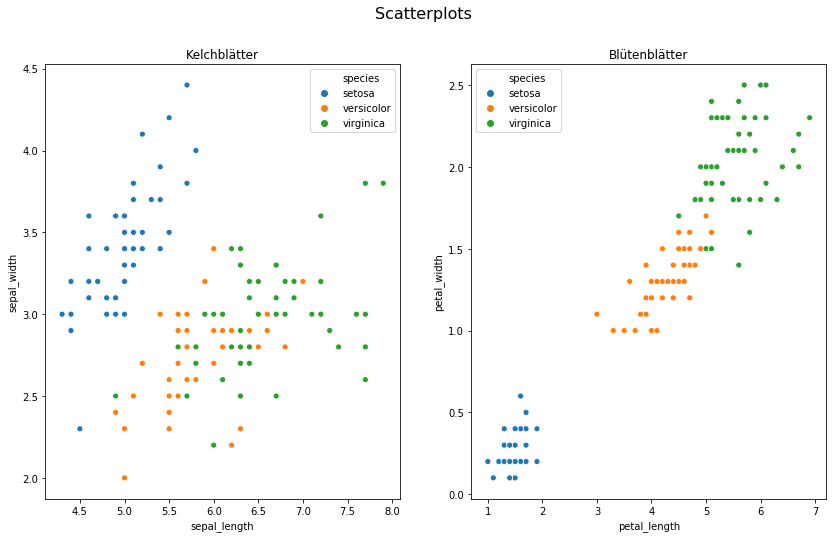

In [19]:
fig, axes = plt.subplots(1,2, figsize=(14,8))
fig.suptitle("Scatterplots", fontsize=16)
axes[0].set_title('Kelchblätter')
sns.scatterplot('sepal_length', 'sepal_width', hue='species', data=df, ax=axes[0])
axes[1].set_title('Blütenblätter')
sns.scatterplot('petal_length', 'petal_width', hue='species', data=df, ax=axes[1])

## Scatterplot Matrizen / 

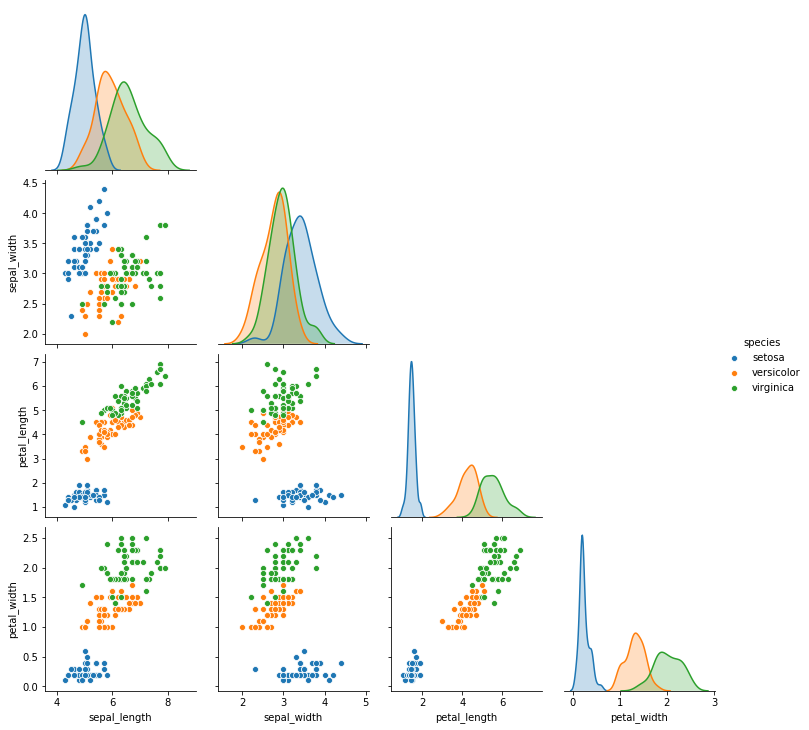

In [20]:
grid = sns.pairplot(df, hue="species", corner=True)

Aber zur Erinnerung. Wenn wir die richtigen Labels nicht haben, dann würden die gleichen Daten bei der ersten Exploration so aussehen:

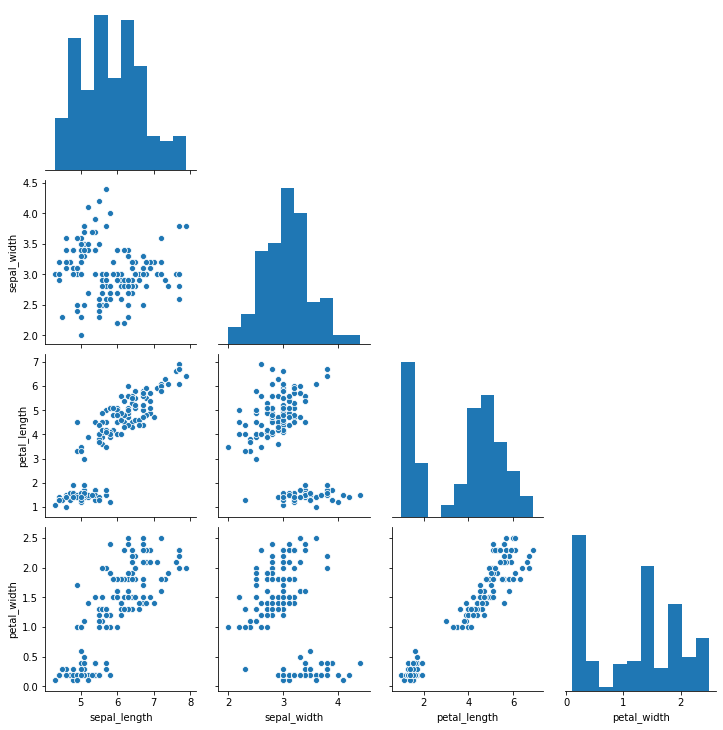

In [21]:
grid = sns.pairplot(df, corner=True)

## Dimensionsreduktion

### Dimensionsreduktion mit der Principal Component Analysis

Erläuterung: Everitt Kap. 2.3.1

Eine gute Erläuterung: Matt Brems: A One-Stop Shop for Principal Component Analysis. Towards Data Science 17.4.2017 [Link](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c). Mit vielen weiteren Verweisen.

Wer es lieber als Video hat: 

* [Statquest: PCA step by step](https://www.youtube.com/watch?v=FgakZw6K1QQ)
* Wer mehr zur linearen Algebra wissen möchte: [3blue1browns Videos](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

In [19]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### PCA mit scikit-learn

Wie in scikit-learn üblich initialisieren wir zuerst das Modell mit den Parametern, aber noch ohne Daten. Der Parameter n_components dient der Angabe, wieviele Dimensionen die Daten nach der Transformation haben sollen.

In [16]:
pca = PCA(n_components=2)

**Exkurs: Daten richtig vorbereit!**

Damit PCA richtig funktioniert, müssen die Daten so transformiert werden, dass der Mittelwert für jede Variable 0 ist. Das erreicht man, indem man den Mittelwert $\mu$ für eine Variable berechnet und dann diesen Mittelwert von jedem Einzelwert ($x_i$) subtrahiert, also: 

$$
f(x) = x_i-\mu_x
$$


Dafür kann man die sehr kompakte Schreibweise von pandas / numpy verwenden:

In [17]:
df.iloc[:,:4] = df.iloc[:,:4] - df.iloc[:,:4].mean()

Wenn die Werte einer Variablen im Vergleich zu den Werten der anderen Variablen sehr groß sind, und diese Häufigkeit nicht relevant für die Wichtigkeit dieser Variablen, dann sollte man die Variablen auch noch standardisieren, d.h. wir berechnen für jede Variable ($x_i$) die Standardabweichung ($\sigma$) und teilen jeden Wert durch die Standardabweichung, also:

$$
f(x) = x_i / \sigma_x
$$


Anstelle der ursprünglichen Einheit, z.B. Anzahl der Worte, Zentimeter usw., besagt nun jede Zahl wieviele Einheiten der Standardabweichung der Wert über oder unter dem Mittelwert liegt.

In [18]:
df.iloc[:,:4] = df.iloc[:,:4] = df.iloc[:,:4] / df.iloc[:,:4].std()

**Exkurs Ende: Weiter mit PCA in scikit learn**

Im nächsten Schritt passen wir den Transformer an die Daten an ('fit') und verwenden ihn dann, um die Dimensionsreduktion der Daten durchzuführen. 

In [19]:
pca.fit(df.iloc[:, 0:4])
X_tf = pca.transform(df.iloc[:, 0:4])

Kann man auch in einem Schritt mit dieser Methode machen:

In [20]:
X_tf = pca.fit_transform(df.iloc[:, 0:4])

In [21]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


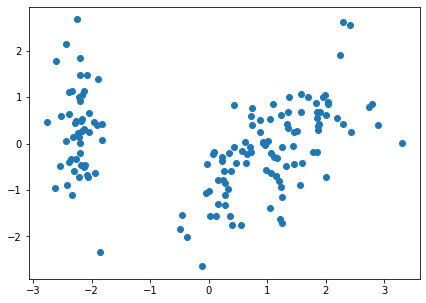

In [22]:
x = X_tf[:,0]
y = X_tf[:,1]
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o');

In [23]:
df['pca2d_1'] = X_tf[:,0]
df['pca2d_2'] = X_tf[:,1]

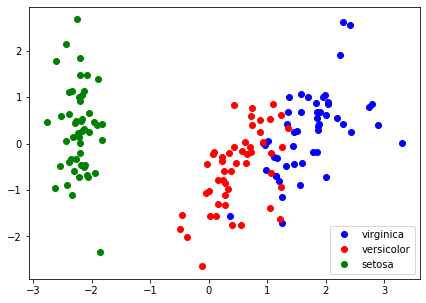

In [24]:
species = set(df.species)
colors  = ['blue', 'red', 'green' ]

plt.figure(figsize=(7,5))
for iris_class, color in zip(species, colors):
    x = df['pca2d_1'][df.species==iris_class]
    y = df['pca2d_2'][df.species==iris_class]
    plt.plot(x, y,'o', color=color, label=iris_class)
plt.legend();

Wir können die Daten auch auf drei Dimensionen reduzieren:

<IPython.core.display.Javascript object>


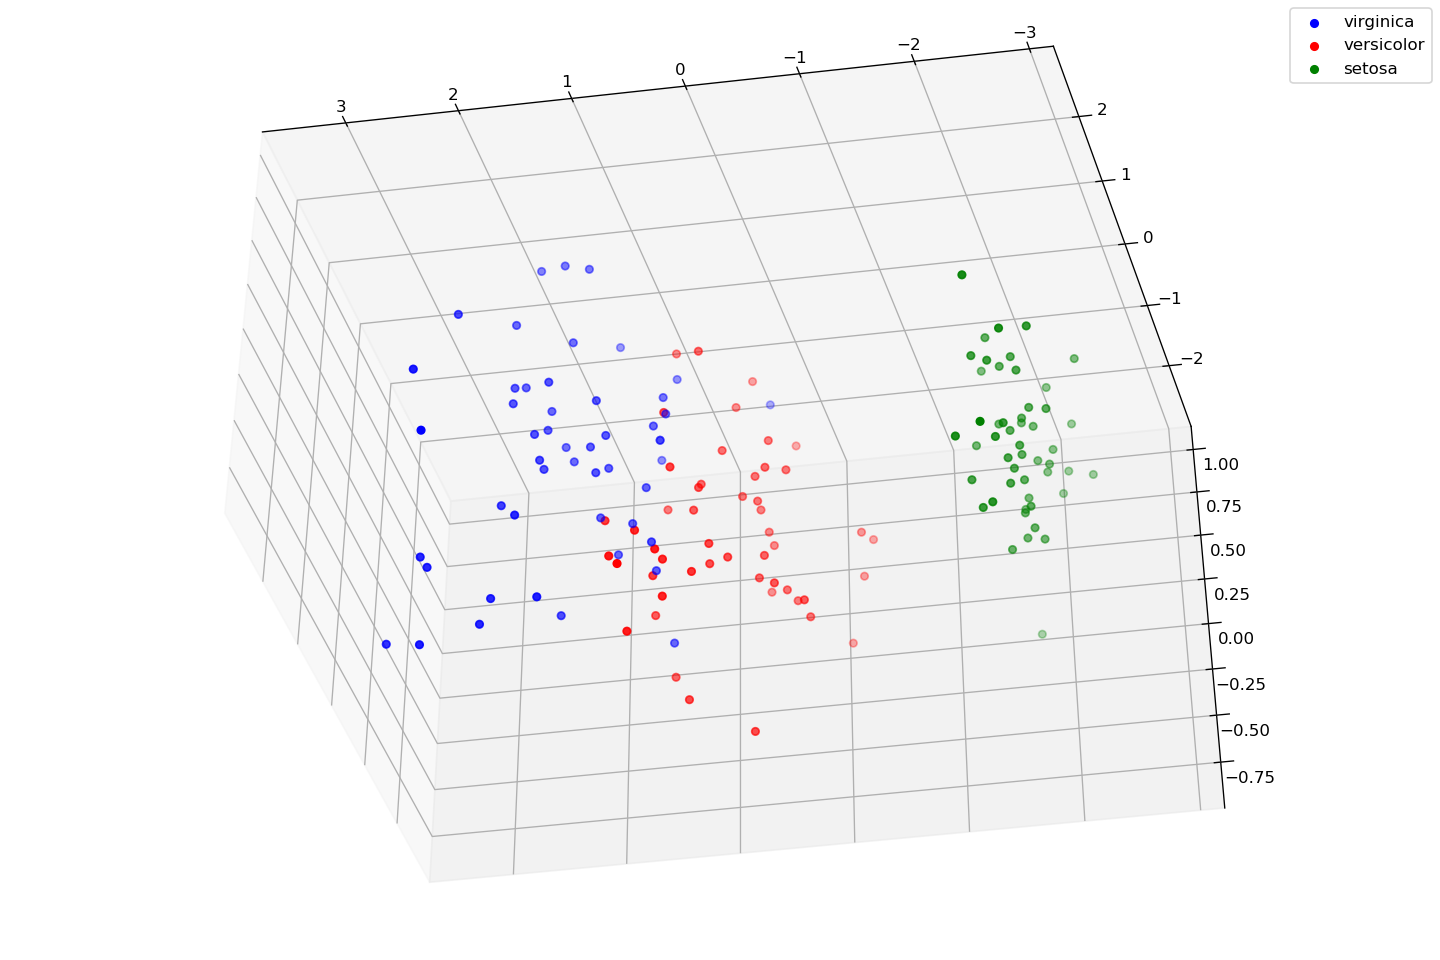

In [25]:
# In 3 dimensions 
%matplotlib notebook
pca = PCA(n_components=3)
pca.fit(df.iloc[:,0:4])
X_tf = pca.transform(df.iloc[:,0:4])
df['pca3d_1'] = X_tf[:,0]
df['pca3d_2'] = X_tf[:,1]
df['pca3d_3'] = X_tf[:,2]

fig = plt.figure(1, figsize=(12, 8))

ax = Axes3D(fig,  elev=30, azim=134)

for iris_class, color in zip(species, colors):
    x = X_tf[:,0][df.species==iris_class]
    y = X_tf[:,1][df.species==iris_class]
    z = X_tf[:,2][df.species==iris_class]    
    ax.scatter(x, y, z, c=color, marker='o', label=iris_class)
plt.legend();

In [26]:
%matplotlib inline

Weitere wichtige Dimensionsreduktionsverfahren:

### Multidimensional Scaling (MDS)
[Erklärung](https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling) 

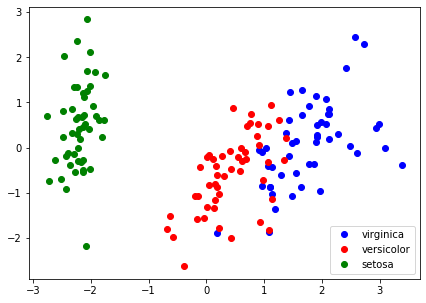

In [27]:
model = manifold.MDS(2, max_iter=100, n_init=1)
X_tf = model.fit_transform(df.iloc[:, 0:4])
df['mds_1'] = X_tf[:,0]
df['mds_2'] = X_tf[:,1]

plt.figure(figsize=(7,5))
for iris_class, color in zip(species, colors):
    x = df['mds_1'][df.species==iris_class]
    y = df['mds_2'][df.species==iris_class]
    plt.plot(x, y,'o', color=color, label=iris_class)
plt.legend();

### t-distributed Stochastic Neighbor Embedding (t-sne)
[Erklärung](https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne)
Achtung: t-sne ist sehr mächtig, aber leider auch sehr sensibel gegenüber Variationen der Parameter. Siehe diese [ausführliche Diskussion](https://distill.pub/2016/misread-tsne/)  Sie können das selbst ausprobieren, indem Sie den Wert von perplexity verändern, z.b. auf 30 oder 100.

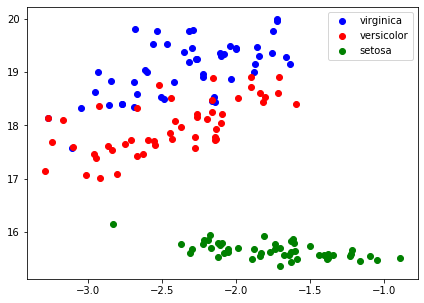

In [28]:
model = manifold.TSNE(n_components=2, perplexity=100, random_state=0)
X_tf = model.fit_transform(df.iloc[:, 0:4])
df['tsne_1'] = X_tf[:,0]
df['tsne_2'] = X_tf[:,1]

plt.figure(figsize=(7,5))
for iris_class, color in zip(species, colors):
    x = df['tsne_1'][df.species==iris_class]
    y = df['tsne_2'][df.species==iris_class]
    plt.plot(x, y,'o', color=color, label=iris_class)
plt.legend();

### Umap
[Erklärung](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html)

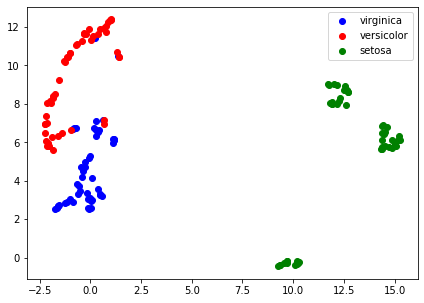

In [32]:
import umap
model = umap.UMAP(n_components=2, n_neighbors=6, random_state=42)
X_tf = model.fit_transform(df.iloc[:, 0:4])
df['umap_1'] = X_tf[:,0]
df['umap_2'] = X_tf[:,1]

plt.figure(figsize=(7,5))
for iris_class, color in zip(species, colors):
    x = df['umap_1'][df.species==iris_class]
    y = df['umap_2'][df.species==iris_class]
    plt.plot(x, y,'o', color=color, label=iris_class)
plt.legend();

# Literatur

Kap. 2: Detecting Clusters Graphically. In: Everitt et al.: Cluster Analysis 5th ed. Chichester 2011.